<a href="https://colab.research.google.com/github/sauravkb94/Audio-classification/blob/main/UrbransoundPresentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

# Map 1 library
import plotly.express as px


# Librosa Libraries
import librosa
import librosa.display
import IPython.display as ipd

import sklearn

import warnings
warnings.filterwarnings('ignore')

In [48]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [49]:
# Importing 1 file
y, sr = librosa.load('/content/drive/MyDrive/UrbanSound8K/Drilling.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', np.shape(y)[0]/sr)

y: [ 0.00176717  0.00244008  0.00178848 ... -0.07394644 -0.03703501
 -0.1912726 ] 

y shape: (88200,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 4.0


In [50]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [ 0.00176717  0.00244008  0.00178848 ... -0.07394644 -0.03703501
 -0.1912726 ] 

Audio File shape: (88200,)


In [51]:
# Importing the 10 files

#Drilling
Drilling= ('/content/drive/MyDrive/UrbanSound8K/Drilling.wav')
y_Drilling, sr_Drilling = librosa.load(Drilling)
audio_Drilling, _ = librosa.effects.trim(y_Drilling)

#DOGBARK
DOGBARK= ('/content/drive/MyDrive/UrbanSound8K/dog_bark.wav')
y_DOGBARK, sr_DOGBARK = librosa.load(DOGBARK)
audio_DOGBARK, _ = librosa.effects.trim(y_DOGBARK)

#Carhorn
CARHORN= ('/content/drive/MyDrive/UrbanSound8K/car_horn.wav')
y_CARHORN, sr_CARHORN = librosa.load(CARHORN)
audio_CARHORN, _ = librosa.effects.trim(y_CARHORN)

#Childrenplaying
Childrenplaying= ('/content/drive/MyDrive/UrbanSound8K/children_playing.wav')
y_Childrenplaying, sr_Childrenplaying = librosa.load(Childrenplaying)
audio_Childrenplaying, _ = librosa.effects.trim(y_Childrenplaying)

#Streetmusic
Streetmusic= ('/content/drive/MyDrive/UrbanSound8K/Street Music.wav')
y_Streetmusic, sr_Streetmusic = librosa.load(Streetmusic)
audio_Streetmusic, _ = librosa.effects.trim(y_Streetmusic)


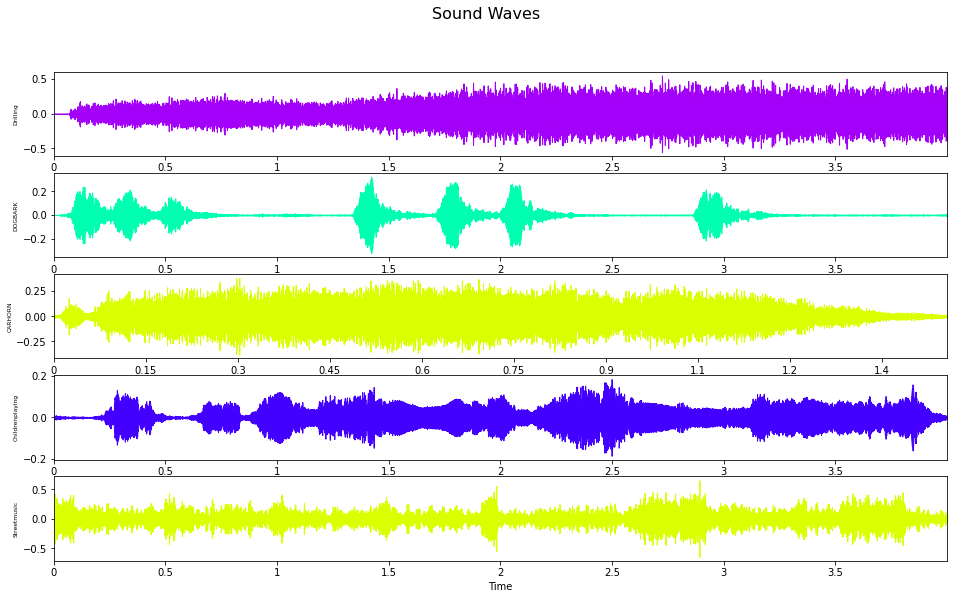

In [52]:
#REPRESENTATION OF 2D SIGNAL
sound_sample_list = ["Drilling", "DOGBARK","CARHORN","Childrenplaying","Streetmusic"]

fig, ax = plt.subplots(5, figsize = (16, 9))
fig.suptitle('Sound Waves', fontsize=16)

librosa.display.waveplot(y = audio_Drilling, sr = sr_Drilling, color = "#A300F9", ax=ax[0])
librosa.display.waveplot(y = audio_DOGBARK, sr = sr_DOGBARK, color = "#00FFB0", ax=ax[1]) 
librosa.display.waveplot(y = audio_CARHORN, sr = sr_CARHORN, color = "#D9FF00", ax=ax[2])
librosa.display.waveplot(y = audio_Childrenplaying, sr = sr_Childrenplaying, color = "#4300FF", ax=ax[3])
librosa.display.waveplot(y = audio_Streetmusic, sr = sr_Streetmusic, color = "#D9FF00", ax=ax[4]);

for i, name in zip(range(5), sound_sample_list):
    ax[i].set_ylabel(name, fontsize=6)

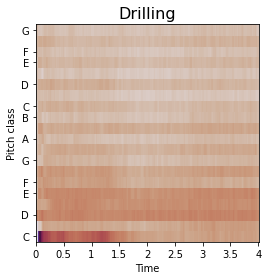

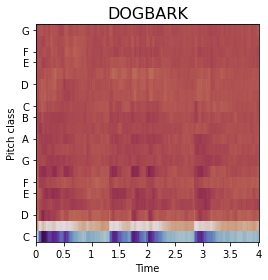

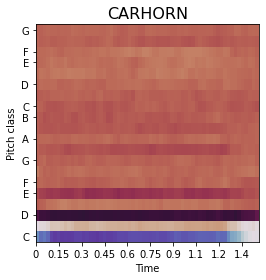

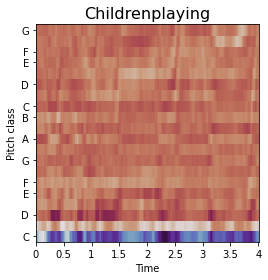

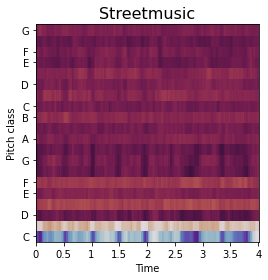

In [53]:
#8. MFCC REPRESENTATION
# Increase or decrease hop_length to change how granular you want your data to be

# Chromogram 


n_fft = 2048 # FFT window size
hop_length = 512


chromagram = librosa.feature.mfcc(audio_Drilling, sr=sr_Drilling, hop_length=hop_length)
plt.figure(figsize=(4,4))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='twilight')
plt.title("Drilling", fontsize=16);

chromagram = librosa.feature.mfcc(audio_DOGBARK, sr=sr_DOGBARK, hop_length=hop_length)
plt.figure(figsize=(4,4))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='twilight')
plt.title("DOGBARK", fontsize=16);

chromagram = librosa.feature.mfcc(audio_CARHORN, sr=sr_CARHORN, hop_length=hop_length)
plt.figure(figsize=(4,4))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='twilight')
plt.title("CARHORN", fontsize=16);

chromagram = librosa.feature.mfcc(audio_Childrenplaying, sr=sr_Childrenplaying, hop_length=hop_length)
plt.figure(figsize=(4,4))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='twilight')
plt.title("Childrenplaying", fontsize=16);

chromagram = librosa.feature.mfcc(audio_Streetmusic, sr=sr_Streetmusic, hop_length=hop_length)
plt.figure(figsize=(4,4))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='twilight')
plt.title("Streetmusic", fontsize=16);

In [54]:
#FOURIER TRANSFORM
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D_Drilling = np.abs(librosa.stft(audio_Drilling, n_fft = n_fft, hop_length = hop_length))
D_DOGBARK = np.abs(librosa.stft(audio_DOGBARK, n_fft = n_fft, hop_length = hop_length))
D_CARHORN  = np.abs(librosa.stft(audio_CARHORN, n_fft = n_fft, hop_length = hop_length))
D_Childrenplaying= np.abs(librosa.stft(audio_Childrenplaying, n_fft = n_fft, hop_length = hop_length))
D_Streetmusic = np.abs(librosa.stft(audio_Streetmusic, n_fft = n_fft, hop_length = hop_length))

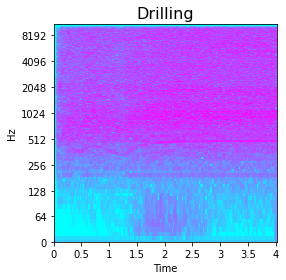

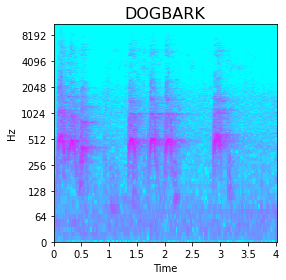

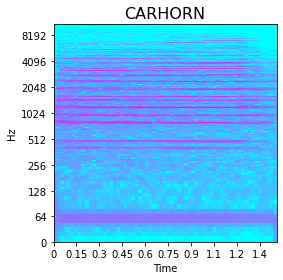

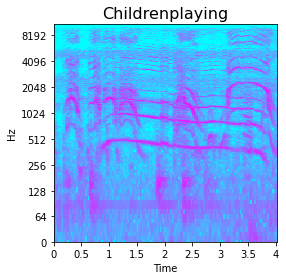

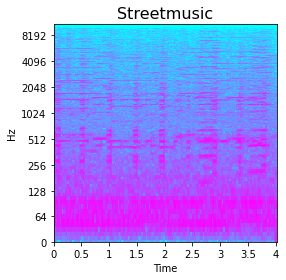

In [55]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.

DB_Drilling = librosa.amplitude_to_db(D_Drilling, ref = np.max)
plt.figure(figsize=(4,4))
librosa.display.specshow(DB_Drilling, sr = sr_Drilling, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'cool')
plt.title("Drilling", fontsize=16);

DB_DOGBARK = librosa.amplitude_to_db(D_DOGBARK, ref = np.max)
plt.figure(figsize=(4,4))
librosa.display.specshow(DB_DOGBARK, sr = sr_DOGBARK, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'cool')
plt.title("DOGBARK", fontsize=16);

DB_CARHORN = librosa.amplitude_to_db(D_CARHORN, ref = np.max)
plt.figure(figsize=(4,4))
librosa.display.specshow(DB_CARHORN, sr = sr_CARHORN, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'cool')
plt.title("CARHORN", fontsize=16);

DB_Childrenplaying = librosa.amplitude_to_db(D_Childrenplaying, ref = np.max)
plt.figure(figsize=(4,4))
librosa.display.specshow(DB_Childrenplaying, sr = sr_Childrenplaying, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'cool')
plt.title("Childrenplaying", fontsize=16);

DB_Streetmusic = librosa.amplitude_to_db(D_Streetmusic, ref = np.max)
plt.figure(figsize=(4,4))
librosa.display.specshow(DB_Streetmusic, sr = sr_Streetmusic, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'cool');
plt.title("Streetmusic", fontsize=16);


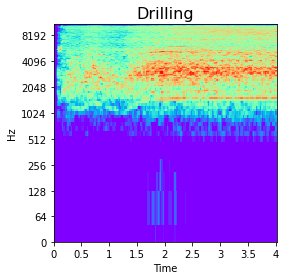

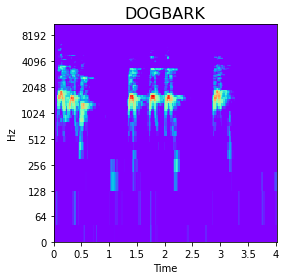

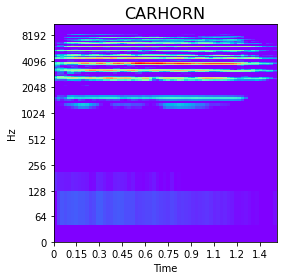

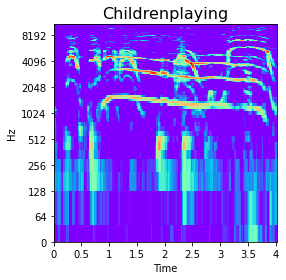

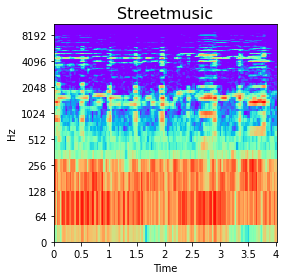

In [ ]:
# Create the Mel Spectrograms


S_Drilling = librosa.feature.melspectrogram(y_Drilling, sr=sr_Drilling)
S_DB_Drilling = librosa.amplitude_to_db(S_Drilling, ref=np.max)

S_DOGBARK = librosa.feature.melspectrogram(y_DOGBARK, sr=sr_DOGBARK)
S_DB_DOGBARK = librosa.amplitude_to_db(S_DOGBARK, ref=np.max)

S_CARHORN = librosa.feature.melspectrogram(y_CARHORN, sr=sr_CARHORN)
S_DB_CARHORN = librosa.amplitude_to_db(S_CARHORN, ref=np.max)

S_Childrenplaying= librosa.feature.melspectrogram(y_Childrenplaying, sr=sr_Childrenplaying)
S_DB_Childrenplaying = librosa.amplitude_to_db(S_Childrenplaying, ref=np.max)

S_Streetmusic = librosa.feature.melspectrogram(y_Streetmusic, sr=sr_Streetmusic)
S_DB_Streetmusic = librosa.amplitude_to_db(S_Streetmusic, ref=np.max)

# === PLOT ====

plt.figure(figsize=(4,4))
librosa.display.specshow(S_DB_Drilling, sr = sr_Drilling, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow')
plt.title("Drilling", fontsize=16);

plt.figure(figsize=(4,4))
librosa.display.specshow(S_DB_DOGBARK, sr = sr_DOGBARK, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow')
plt.title("DOGBARK", fontsize=16);

plt.figure(figsize=(4,4))
librosa.display.specshow(S_DB_CARHORN, sr = sr_CARHORN, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow')
plt.title("CARHORN", fontsize=16);

plt.figure(figsize=(4,4))
librosa.display.specshow(S_DB_Childrenplaying, sr = sr_Childrenplaying, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow')
plt.title("Childrenplaying", fontsize=16);

plt.figure(figsize=(4,4))
librosa.display.specshow(S_DB_Streetmusic, sr = sr_Streetmusic, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow');
plt.title("Streetmusic", fontsize=16);

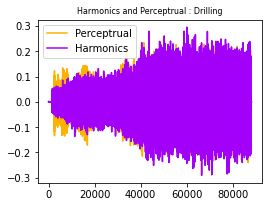

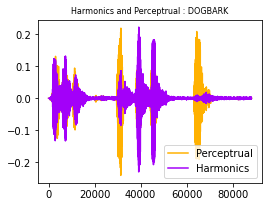

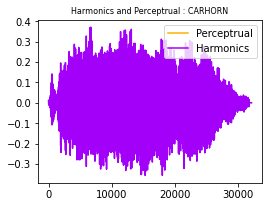

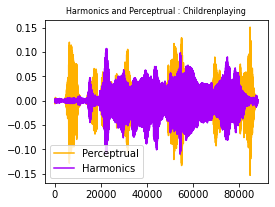

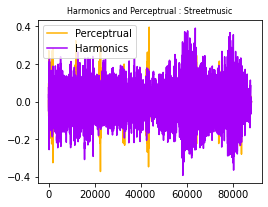

In [56]:
#HARMONICS AND PERCEPTUAL 
y_harm_Drilling, y_perc_Drilling = librosa.effects.hpss(audio_Drilling)
y_harm_DOGBARK, y_perc_DOGBARK = librosa.effects.hpss(audio_DOGBARK)
y_harm_CARHORN, y_perc_CARHORN= librosa.effects.hpss(audio_CARHORN)
y_harm_Childrenplaying, y_perc_Childrenplaying = librosa.effects.hpss(audio_Childrenplaying)
y_harm_Streetmusic, y_perc_Streetmusic = librosa.effects.hpss(audio_Streetmusic)

plt.figure(figsize = (4, 3))
plt.plot(y_perc_Drilling, color = '#FFB100')
plt.plot(y_harm_Drilling, color = '#A300F9')
plt.title("Harmonics and Perceptrual : Drilling", fontsize=8)
plt.legend(("Perceptrual", "Harmonics"))

plt.figure(figsize = (4, 3))
plt.plot(y_perc_DOGBARK, color = '#FFB100')
plt.plot(y_harm_DOGBARK, color = '#A300F9')
plt.title("Harmonics and Perceptrual : DOGBARK", fontsize=8)
plt.legend(("Perceptrual", "Harmonics"))

plt.figure(figsize = (4, 3))
plt.plot(y_perc_CARHORN, color = '#FFB100')
plt.plot(y_harm_CARHORN, color = '#A300F9')
plt.title("Harmonics and Perceptrual : CARHORN", fontsize=8)
plt.legend(("Perceptrual", "Harmonics"))

plt.figure(figsize = (4, 3))
plt.plot(y_perc_Childrenplaying, color = '#FFB100')
plt.plot(y_harm_Childrenplaying, color = '#A300F9')
plt.title("Harmonics and Perceptrual : Childrenplaying", fontsize=8)
plt.legend(("Perceptrual", "Harmonics"))

plt.figure(figsize = (4, 3))
plt.plot(y_perc_Streetmusic, color = '#FFB100')
plt.plot(y_harm_Streetmusic, color = '#A300F9')
plt.title("Harmonics and Perceptrual : Streetmusic", fontsize=8)
plt.legend(("Perceptrual", "Harmonics"))

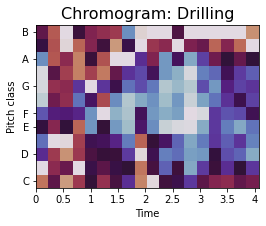

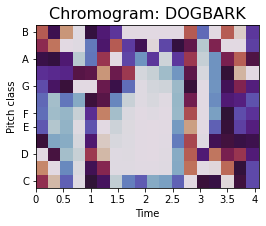

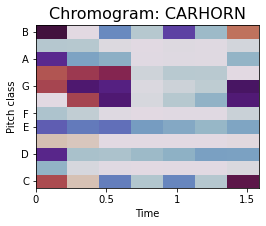

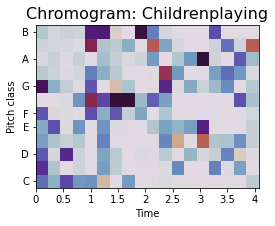

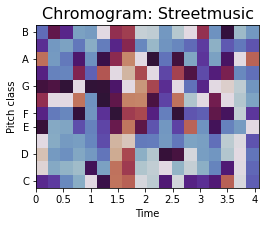

In [ ]:
#CHROMAGRAM
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000



# Chromogram Vesspa
chromagram = librosa.feature.chroma_stft(audio_Drilling, sr=sr_Drilling, hop_length=hop_length)
plt.figure(figsize=(4, 3))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='twilight')
plt.title("Chromogram: Drilling", fontsize=16);

chromagram = librosa.feature.chroma_stft(audio_DOGBARK, sr=sr_DOGBARK, hop_length=hop_length)
plt.figure(figsize=(4, 3))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='twilight')
plt.title("Chromogram: DOGBARK", fontsize=16);

chromagram = librosa.feature.chroma_stft(audio_CARHORN, sr=sr_CARHORN, hop_length=hop_length)
plt.figure(figsize=(4, 3))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='twilight')
plt.title("Chromogram: CARHORN", fontsize=16);

chromagram = librosa.feature.chroma_stft(audio_Childrenplaying, sr=sr_Childrenplaying, hop_length=hop_length)
plt.figure(figsize=(4, 3))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='twilight')
plt.title("Chromogram: Childrenplaying", fontsize=16);

chromagram = librosa.feature.chroma_stft(audio_Streetmusic, sr=sr_Streetmusic, hop_length=hop_length)
plt.figure(figsize=(4, 3))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='twilight')
plt.title("Chromogram: Streetmusic", fontsize=16);

Text(0.5, 1.0, 'Spectral Rolloff: Streetmusic')

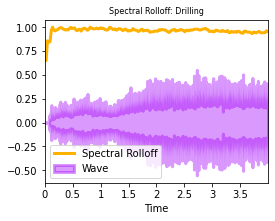

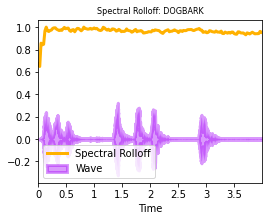

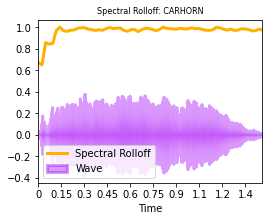

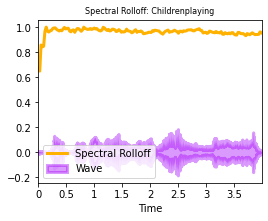

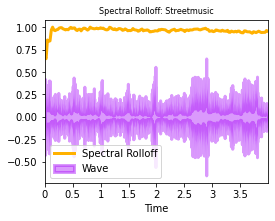

In [58]:
from librosa.util import normalize
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(audio_Drilling, sr=sr_Drilling)[0]

# Computing the time variable for visualization
frames = range(len(spectral_rolloff))
# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

# The plot
plt.figure(figsize = (4,3))
librosa.display.waveplot(audio_Drilling, sr=sr_Drilling, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_rolloff), color='#FFB100', lw=3)
plt.legend(["Spectral Rolloff", "Wave"])
plt.title("Spectral Rolloff: Drilling", fontsize=8)

plt.figure(figsize = (4,3))
librosa.display.waveplot(audio_DOGBARK, sr=sr_DOGBARK, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_rolloff), color='#FFB100', lw=3)
plt.legend(["Spectral Rolloff", "Wave"])
plt.title("Spectral Rolloff: DOGBARK", fontsize=8)

plt.figure(figsize = (4,3))
librosa.display.waveplot(audio_CARHORN, sr=sr_CARHORN, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_rolloff), color='#FFB100', lw=3)
plt.legend(["Spectral Rolloff", "Wave"])
plt.title("Spectral Rolloff: CARHORN", fontsize=8)

plt.figure(figsize = (4,3))
librosa.display.waveplot(audio_Childrenplaying, sr=sr_Childrenplaying, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_rolloff), color='#FFB100', lw=3)
plt.legend(["Spectral Rolloff", "Wave"])
plt.title("Spectral Rolloff: Childrenplaying", fontsize=8)

plt.figure(figsize = (4,3))
librosa.display.waveplot(audio_Streetmusic, sr=sr_Streetmusic, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_rolloff), color='#FFB100', lw=3)
plt.legend(["Spectral Rolloff", "Wave"])
plt.title("Spectral Rolloff: Streetmusic", fontsize=8)